In [1]:
import clip
import torch
from PIL import Image
import os

# Load the pre-trained CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [2]:
data_path = "FishImgDataset/train"
fish_classes = os.listdir(data_path)  # List of fish class names (folder names)
fish_classes.sort()

# Convert class names into text prompts
text_prompts = [f"a photo of a {fish_class}" for fish_class in fish_classes]
text_tokens = clip.tokenize(text_prompts).to(device)

In [3]:
fish_classes, text_prompts, text_tokens

(['Bangus',
  'Big Head Carp',
  'Black Spotted Barb',
  'Catfish',
  'Climbing Perch',
  'Fourfinger Threadfin',
  'Freshwater Eel',
  'Glass Perchlet',
  'Goby',
  'Gold Fish',
  'Gourami',
  'Grass Carp',
  'Green Spotted Puffer',
  'Indian Carp',
  'Indo-Pacific Tarpon',
  'Jaguar Gapote',
  'Janitor Fish',
  'Knifefish',
  'Long-Snouted Pipefish',
  'Mosquito Fish',
  'Mudfish',
  'Mullet',
  'Pangasius',
  'Perch',
  'Scat Fish',
  'Silver Barb',
  'Silver Carp',
  'Silver Perch',
  'Snakehead',
  'Tenpounder',
  'Tilapia'],
 ['a photo of a Bangus',
  'a photo of a Big Head Carp',
  'a photo of a Black Spotted Barb',
  'a photo of a Catfish',
  'a photo of a Climbing Perch',
  'a photo of a Fourfinger Threadfin',
  'a photo of a Freshwater Eel',
  'a photo of a Glass Perchlet',
  'a photo of a Goby',
  'a photo of a Gold Fish',
  'a photo of a Gourami',
  'a photo of a Grass Carp',
  'a photo of a Green Spotted Puffer',
  'a photo of a Indian Carp',
  'a photo of a Indo-Pacific T

In [4]:
correct_predictions = 0
total_images = 0

# Generate embeddings for each text prompts
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features /= text_features.norm(dim=-1, keepdim=True)

# Evaluate images
for fish_class in fish_classes:
    folder_path = os.path.join(data_path, fish_class)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        
        # Load and preprocess each image for CLIP
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

        # Generate embeddings for each image
        with torch.no_grad():
            image_features = model.encode_image(image)
            image_features /= image_features.norm(dim=-1, keepdim=True)

            # Compute similarity between Image and Text embedding
            # similarity = vector of similarity scores
            # predicted_class_idx = index of highest similarity score
            similarity = (image_features @ text_features.T).squeeze(0)
            predicted_class_idx = similarity.argmax().item()
        
        # Check if prediction is correct
        if fish_class == fish_classes[predicted_class_idx]:
            correct_predictions += 1
        total_images += 1
        
        # Print progress for every 100 images
        if total_images % 500 == 0:
            print(f"Processed {total_images} images. Current accuracy: {correct_predictions / total_images:.2f}")

# Calculate baseline accuracy
baseline_accuracy = correct_predictions / total_images
print(f"Baseline Accuracy: {baseline_accuracy:.2f} ({correct_predictions}/{total_images})")

Processed 500 images. Current accuracy: 0.25
Processed 1000 images. Current accuracy: 0.16
Processed 1500 images. Current accuracy: 0.23
Processed 2000 images. Current accuracy: 0.18
Processed 2500 images. Current accuracy: 0.14
Processed 3000 images. Current accuracy: 0.20
Processed 3500 images. Current accuracy: 0.26
Processed 4000 images. Current accuracy: 0.25
Processed 4500 images. Current accuracy: 0.25
Processed 5000 images. Current accuracy: 0.24
Processed 5500 images. Current accuracy: 0.23
Processed 6000 images. Current accuracy: 0.25
Processed 6500 images. Current accuracy: 0.23
Processed 7000 images. Current accuracy: 0.22
Processed 7500 images. Current accuracy: 0.21
Processed 8000 images. Current accuracy: 0.22
Processed 8500 images. Current accuracy: 0.23
Baseline Accuracy: 0.24 (2115/8811)


In [5]:
import clip
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import os

# Load the pre-trained CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Define the fish dataset class for handling loading images and their class index
class FishDataset(Dataset):
    def __init__(self, root_dir, preprocess):
        self.image_paths = [] # the directory for each image
        self.class_idx = [] # the class index for each image
        self.classes = os.listdir(root_dir) # list of classes
        self.classes.sort()

        for class_index, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for image_name in os.listdir(class_dir):
                self.image_paths.append(os.path.join(class_dir, image_name))
                self.class_idx.append(class_index)

        self.preprocess = preprocess
    
    # return number of images in dataset
    def __len__(self):
        return len(self.image_paths)
    
    # return the image in the index and its class index
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        class_index = self.class_idx[idx]
        return self.preprocess(image), class_index


Epoch 1/7 - Training started.
Epoch 1/7 - Loss: 3.0524, Accuracy: 0.1523
Epoch 2/7 - Training started.
Epoch 2/7 - Loss: 2.5795, Accuracy: 0.3033
Epoch 3/7 - Training started.
Epoch 3/7 - Loss: 2.2467, Accuracy: 0.4520
Epoch 4/7 - Training started.
Epoch 4/7 - Loss: 1.9936, Accuracy: 0.5504
Epoch 5/7 - Training started.
Epoch 5/7 - Loss: 1.7961, Accuracy: 0.6065
Epoch 6/7 - Training started.
Epoch 6/7 - Loss: 1.6405, Accuracy: 0.6529
Epoch 7/7 - Training started.
Epoch 7/7 - Loss: 1.5141, Accuracy: 0.6770
Finished fine tuning model.


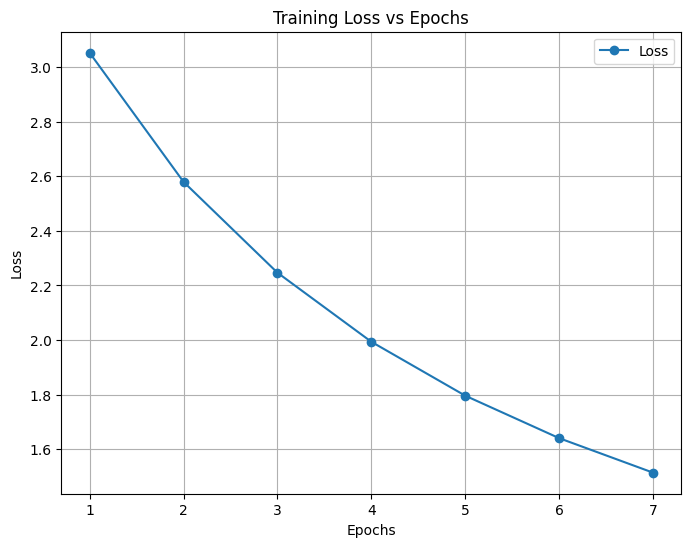

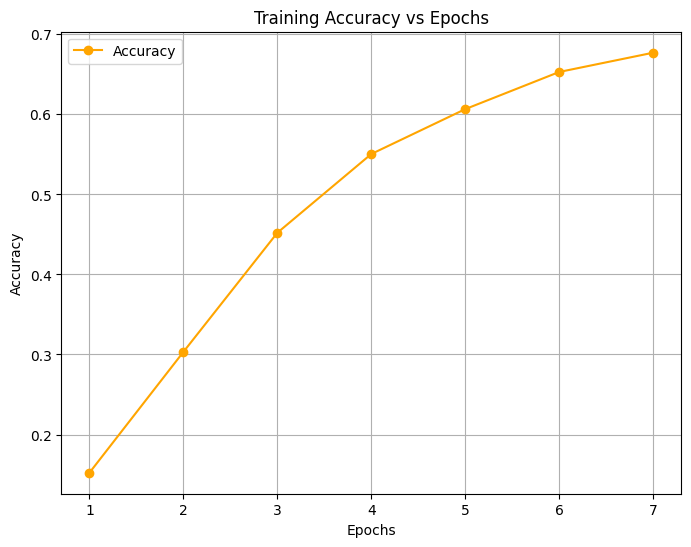

In [6]:
# Prepare dataset and DataLoader
data_path = "FishImgDataset/train"
train_dataset = FishDataset(data_path, preprocess)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Freeze CLIP's image encoder
for param in model.visual.parameters():
    param.requires_grad = False

# Create classification head
num_classes = len(train_dataset.classes)
classifier = nn.Linear(model.visual.output_dim, num_classes).to(device)
model = nn.Sequential(model.visual, classifier).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=1e-4)

# store training metrics for visualization
epochs = []
losses = []
accuracies = []

# Training loop
num_epochs = 7
for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_images = 0

    print(f"Epoch {epoch}/{num_epochs} - Training started.")
    for batch_idx, (images, class_indexes) in enumerate(train_loader, 1):
        images, class_indexes = images.to(device), class_indexes.to(device)

        # Forward pass
        with torch.no_grad():
            image_features = model[0](images)
        logits = model[1](image_features)

        # Compute loss
        loss = criterion(logits, class_indexes)
        total_loss += loss.item()

        # Backward pass and update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compare to ground truth & track accuracy
        predictions = logits.argmax(dim=1)
        correct_predictions += (predictions == class_indexes).sum().item()
        total_images += len(images)

        # Print progress every 10 batches
        #if batch_idx % 10 == 0:
        #    print(f"Batch {batch_idx}/{len(train_loader)}")

    # Log metrics for the epoch
    epoch_accuracy = correct_predictions / total_images
    epoch_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch}/{num_epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    # Append metrics to lists
    epochs.append(epoch)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

# Save the fine-tuned model
torch.save(model.state_dict(), "fine_tuned_clip.pth")
print("Finished fine tuning model.")

# Plotting training metrics
import matplotlib.pyplot as plt

# Plot Loss vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, losses, marker='o', label='Loss')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracies, marker='o', label='Accuracy', color='orange')
plt.title('Training Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the test dataset and DataLoader
test_data_path = "FishImgDataset/test"
test_dataset = FishDataset(test_data_path, preprocess)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the fine-tuned model
model = nn.Sequential(model[0], model[1]).to(device)  # Reconstruct model from parameters
model.load_state_dict(torch.load("fine_tuned_clip.pth"))
print("Loaded fine-tuned model")

# Set the model to evaluation mode
model.eval()

# Track accuracy per class for later comparison
num_classes = len(test_dataset.classes)
class_correct = [0] * num_classes
class_total = [0] * num_classes
all_ground_truth = []
all_predictions = []

# Evaluate test accuracy
correct_predictions = 0
total_images = 0
print("Starting evaluation on test dataset")
with torch.no_grad():
    for batch_idx, (images, class_indexes) in enumerate(test_loader, 1):
        images, class_indexes = images.to(device), class_indexes.to(device)

        # Find predicted class
        image_features = model[0](images)  # CLIP image encoder
        logits = model[1](image_features)  # Classification head
        predictions = logits.argmax(dim=1)

        # Compare predictions with ground truth
        correct_predictions += (predictions == class_indexes).sum().item()
        total_images += len(images)

        # Update per-class metrics
        for i in range(len(class_indexes)):
            class_total[class_indexes[i]] += 1
            if predictions[i] == class_indexes[i]:
                class_correct[class_indexes[i]] += 1

        # Store ground truth and predictions for confusion matrix
        all_ground_truth.extend(class_indexes.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

        # Print progress every 10 batches
        if batch_idx % 10 == 0 or batch_idx == len(test_loader):
            print(f"Batch {batch_idx}/{len(test_loader)}")
            print(f"Current Accuracy: {correct_predictions / total_images:.2f}")

# Calculate test accuracy
print(f"Evaluation Complete.")
test_accuracy = correct_predictions / total_images
print(f"Test Accuracy: {test_accuracy:.2f} ({correct_predictions}/{total_images})")

Loaded fine-tuned model
Starting evaluation on test dataset
Batch 10/56
Current Accuracy: 0.49
Batch 20/56
Current Accuracy: 0.69
Batch 30/56
Current Accuracy: 0.73
Batch 40/56
Current Accuracy: 0.72
Batch 50/56
Current Accuracy: 0.72
Batch 56/56
Current Accuracy: 0.71
Evaluation Complete.
Test Accuracy: 0.71 (1243/1761)


Accuracy for class 'Bangus': 0.38 (13/34)
Accuracy for class 'Big Head Carp': 0.51 (22/43)
Accuracy for class 'Black Spotted Barb': 0.10 (4/40)
Accuracy for class 'Catfish': 0.89 (55/62)
Accuracy for class 'Climbing Perch': 0.00 (0/30)
Accuracy for class 'Fourfinger Threadfin': 0.16 (6/38)
Accuracy for class 'Freshwater Eel': 0.82 (45/55)
Accuracy for class 'Glass Perchlet': 0.81 (62/77)
Accuracy for class 'Goby': 0.91 (113/124)
Accuracy for class 'Gold Fish': 0.76 (31/41)
Accuracy for class 'Gourami': 0.90 (57/63)
Accuracy for class 'Grass Carp': 0.98 (233/238)
Accuracy for class 'Green Spotted Puffer': 0.68 (15/22)
Accuracy for class 'Indian Carp': 0.58 (31/53)
Accuracy for class 'Indo-Pacific Tarpon': 0.41 (16/39)
Accuracy for class 'Jaguar Gapote': 0.93 (41/44)
Accuracy for class 'Janitor Fish': 0.81 (47/58)
Accuracy for class 'Knifefish': 0.74 (48/65)
Accuracy for class 'Long-Snouted Pipefish': 0.94 (49/52)
Accuracy for class 'Mosquito Fish': 0.61 (31/51)
Accuracy for class 'Mudfi

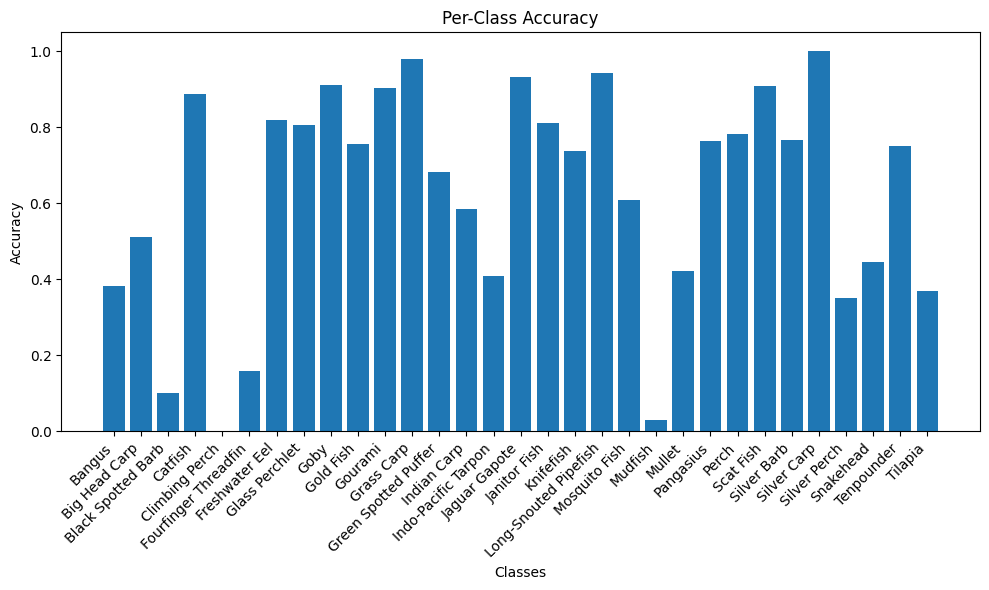

In [17]:
# Calculate per-class accuracy
class_accuracies = [class_correct[i] / class_total[i] for i in range(num_classes)]
for i, class_name in enumerate(test_dataset.classes):
    print(f"Accuracy for class '{class_name}': {class_accuracies[i]:.2f} ({class_correct[i]}/{class_total[i]})")

# Plot per-class accuracy
plt.figure(figsize=(10, 6))
plt.bar(test_dataset.classes, class_accuracies)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

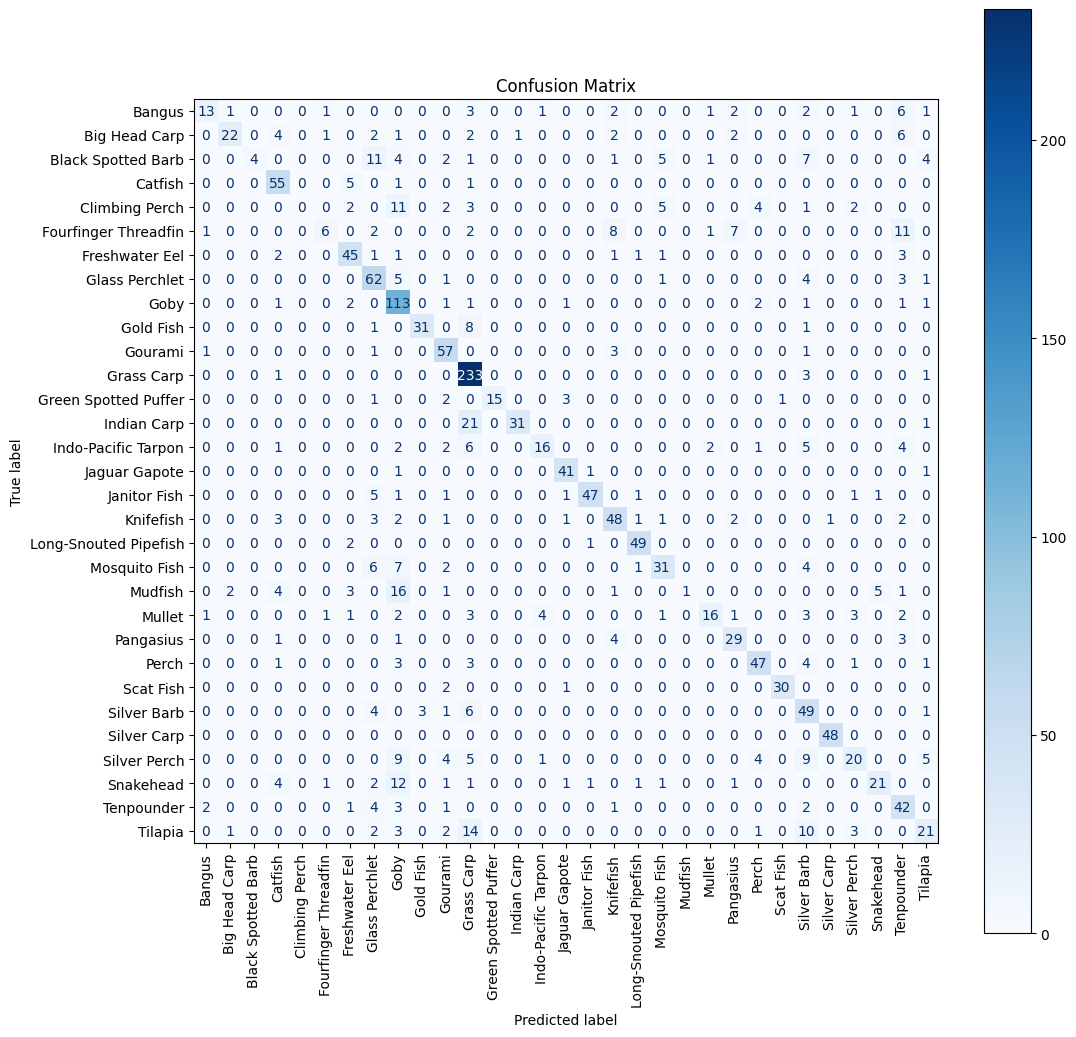

In [34]:
# Compute and plot the confusion matrix
plt.figure(figsize=(12, 12))
cm = confusion_matrix(all_ground_truth, all_predictions, labels=list(range(num_classes)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()